# Lab 5 - Topic Modeling and Named Entity Recognition
## Exercises

___
## Unsupervised vs Supervised learning - Topic Analysis

**1. What is the difference between supervised and unsupervised learning? Discuss some benefits and issues for each approach in the context of topic analysis.**

Your answer here!

Supervised learning requires labeled data, while unsupervised learning does not.

For topic analysis, an unsupervised approach may be more applicable, as topics are rarely well-defined for all domains. A benefit of the unsupervised approach is that we can apply it to any corpus, whereas a supervised topic model will likely perform poorly on out-of-domain tasks.

A clear benefit of supervised learning is that we can evaluate it with clearly defined metrics, such as precision, recall, and f-measure, as well as the likelihood for good performance within the given domain.

___

**2. You are presented with a large dataset of news articles where only 50% of the data has labeled topics (finance, sports, politics, ...) You want to assign labels to the remaining data. Explain your approach (no programming!)**

Your answer here!

We could use a supervised classifier to train on the existing labeled data and perform multi-class prediction on the remaining rows. However, we should also perform data analysis to evaluate whether there's a clear distinction between the articles with the same topics. If we do this, perhaps we will discover that the topics are not well-defined, and we could then use an unsupervised approach.

___

**3. Could the previous question be improved by incorporating ideas from semi-supervised learning? Explain.**

Your answer here!

Semi-supervised learning could be used by combining the typical unsupervised approach to topic modeling (e.g. LDA), then using the labeled data to assign specific topics to clusters, and thus label the remaining data.

___

**4. Metrics are essential when dealing with machine learning. However, regarding unsupervised clustering (e.g., of topics), we cannot use the typical precision, recall, and f-measure metrics. What are the alternatives for this task?**

Your answer here

Homogeneity, completeness, v-measure and silhouette score are some alternatives.

___

## Topic Modeling

Given the five sentences:

>"Macrosoft announces a new Something Pro laptop with a detachable keyboard."

>"Melon Tusk unveils plans for a new spacecraft that could take humans to Mars."

>"The top-grossing movie of the year Ramvel Retaliators."

>"Geeglo releases a new version of its Cyborg operating system."

>"Fletnix announces a new series from the creators of Thinger Strangs."

**1. How would *you* (without programming) assign the listed sentences to separate topics? Consider techniques we have discussed in the course so far (especially Lab 4)**

Your answer here!

Expect the student to reflect around the need for named entities and topic-based words. Perhaps grouping specific products in a "product" category. Phones, PCs, operating systems. There's also some companies involved.

___

Two well-established algorithms for topic discovery are Latent Semantic Indexing (LSI) and Latent Dirichlet Allocation (LDA)

**2. What preprocessing steps should we consider before implementing these algorithms?**

Stemming, lemmatization, stopword removal, TF-IDF

Your answer here!

___

**3. Both LSI and LDA require the user to specify the number of topic clusters. How can we *automatically* detect a reasonable number of topics?**

Your answer here!

The elbow method is a common approach to evaluate the suitable amount of clusters.
There are others, though, such as the silhouette score. Read more here: <https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html>

___

## Practical Exercise - Topic Analaysis and Modeling of Product Reviews
We will now be using an Amazon product review dataset to perform topic modeling. The dataset specifically contains reviews of "appliances", a subset (~100k reviews, ~50 MB) of the full product review corpus (<https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset> - 55GB!)

This task is somewhat open, and whether you want to just cluster isolated reviews, or within subsets from the review score, is up to you.

**1. Load the dataset with `pandas`, apply some preprocessing steps you find suitable, and use at least five different techniques to visualize the data, based on what you have learned in the course.**
- If you are completely new to data science, look up exploratory data analysis (EDA)

In [1]:
# TODO visualize the reviews in at least five different ways
# must include some of the techniques used in this course.
import pandas as pd
df = pd.read_csv("amazon_train.csv")
df.head()

,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body
0,1,1,1,Y,Do not buy this product,I am not a big review writer and truth be told...
1,4,0,0,Y,Wattage is not as advertised.,"Not the advertised 700W. It's actually 1050W,..."
2,1,0,21,Y,don't buy it! $40 to return it. ...,Looks very cheap.... the worse inversion in m...
3,5,0,0,Y,water tastes good.,"Quick shipping, water tastes good."
4,1,8,10,N,Poor quality microwave ruins the product,This unit has the HMB5050 Microwave integrated...


Expect the student to have experimented with...
- word clouds
- tf-idf importance
- top frequency words
- top frequency words in positive and negative reviews
- which POS tags are most common across reviews?
- common adjectives
- ngram frequency
- heatmaps of important words
- sentence lengths
- number of sentences
- avg words per sentence
- common stopwords
- named entities found using e.g. spacy
- readability
    - e.g. flesch kincaid grade

___

**2. Before implementing off-the-shelf topic models, it is useful to consider how to process data for topic analysis. Consider what you have learned so far to generate a processing function and discuss your findings. This should only operate on a word level!**

Below is a snippet to fetch some examples from the review corpus. You can use these to test your output.

In [2]:
# TODO: a preprocessing function to gather words/groups of words/chunks that you consider important for topic analysis/modeling
from typing import List

def preprocess_for_topic(document: str) -> List[str]:
    """
    Preprocesses a document
    Args:
        document (str): The input document to be preprocessed.
    Returns:
        List[str]: A list of words obtained by splitting the document.

    Example:
        input: "This is a test."
        output: ["This", "is", "a", "test."]
    """
    return document.split()

In [3]:
reviews = df["review_body"].tolist()
for review in reviews[:10]:
    print(review)

I am not a big review writer and truth be told after reading Amazon reviews you can weed out good from bad products.  So I place a high value on people who do post reviews, both positive and negative.  A year and a half ago I purchased two different Avanti mini fridges.  One died within a year and was under warranty and was repaired and is still working.  The second one Avanti BCA31SS Beverage Center, failed after a year and a half.  I was told that the warranty was only a year and I would have to call a local service company at my expense.  I explained that 100% of my purchased Avanti units (two unit) purchased within two weeks of each other failed.  Perhaps there was manufacturing issues at the time or perhaps I got stuck with two lemons.  My complaints got no where regarding Avanti covering the repair.  I do not want to yell sour grapes but I expect somewhat longer use from the unit before it died.  Given that the company can document my two units purchased and both units having pro

In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")

/opt/homebrew/lib/python3.11/site-packages/thinc/compat.py:36: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  hasattr(torch, "has_mps")
/opt/homebrew/lib/python3.11/site-packages/thinc/compat.py:37: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  and torch.has_mps  # type: ignore[attr-defined]


In [5]:
from typing import List
from collections import defaultdict
import re
import nltk

# nltk.download('maxent_ne_chunker')
# nltk.download('words')
stopwords = set(nltk.corpus.stopwords.words("english"))

vp = [
    {"POS": "VERB", "OP": "+"},
    {"POS": "DET", "OP": "?"},
    {"POS": "ADJ", "OP": "*"},
    {"POS": "NOUN", "OP": "+"},
]
np = [
    {"POS": "DET", "OP": "{1}"},
    {"POS": "ADJ", "OP": "*"},
    {"POS": "NOUN", "OP": "+"},
]
matcher = spacy.matcher.Matcher(nlp.vocab)
matcher.add("verb_phrase", [vp])
matcher.add("noun_phrase", [np])

clean_pattern = re.compile(r"\b\w+\b")
lemmatizer = nltk.stem.WordNetLemmatizer()


def process_doc(doc: str) -> List[str]:
    # we want to parse with spacy before preprocessing
    spacydoc = nlp(doc)
    matches = matcher(spacydoc)

    chunks = defaultdict(list)
    for match_id, start, end in matches:
        span = spacydoc[start:end]
        match_type = spacydoc.vocab.strings[match_id]
        chunks[match_type].append(span.text)
        print(span.text)

    doc = nltk.word_tokenize(doc.lower())
    doc = [
        lemmatizer.lemmatize(word)
        for word in doc
        if clean_pattern.match(word) and word not in stopwords
    ]

    strings = [" ".join(ngram) for ngram in nltk.ngrams(doc, 2)]
    for chunk in chunks.values():
        strings += chunk

    return list(set(strings))


review = reviews[0]
print(review)
process_doc(review)

I am not a big review writer and truth be told after reading Amazon reviews you can weed out good from bad products.  So I place a high value on people who do post reviews, both positive and negative.  A year and a half ago I purchased two different Avanti mini fridges.  One died within a year and was under warranty and was repaired and is still working.  The second one Avanti BCA31SS Beverage Center, failed after a year and a half.  I was told that the warranty was only a year and I would have to call a local service company at my expense.  I explained that 100% of my purchased Avanti units (two unit) purchased within two weeks of each other failed.  Perhaps there was manufacturing issues at the time or perhaps I got stuck with two lemons.  My complaints got no where regarding Avanti covering the repair.  I do not want to yell sour grapes but I expect somewhat longer use from the unit before it died.  Given that the company can document my two units purchased and both units having pro

['post reviews',
 'unit died',
 'center failed',
 'wanting a small glass door beverage',
 'expense explained',
 'perhaps manufacturing',
 'covering the repair',
 'manufacturing issue',
 'failed year',
 'failed perhaps',
 'anyone wanting',
 'a big review',
 'purchased within',
 'was manufacturing issues',
 'door beverage',
 'year half',
 'based suggest',
 'a local service',
 'manufacturing issues',
 'value people',
 'two lemon',
 'the time',
 'given company',
 'purchased two',
 'still working',
 'beverage center',
 'place a high value',
 'unit anyone',
 'avanti bca31ss',
 'the repair',
 'post review',
 'avanti covering',
 'want yell',
 'bad product',
 'small glass',
 'both units',
 'positive negative',
 'company expense',
 'different avanti',
 'reading amazon',
 'would call',
 'writer truth',
 'the company',
 'A year',
 'this unit',
 'half told',
 'avanti mini',
 'regarding avanti',
 'warranty repaired',
 'stuck two',
 'got stuck',
 'year would',
 'a big review writer',
 'avanti unit',


**3. Using the same data, implement a topic model with LDA using the Gensim library. Experiment with different topic counts (e.g., 3) and retrieve the top 5 words from each. Discuss your findings briefly!**

In [6]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
texts = df['review_body'].tolist()

def some_cleaning(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d+','',text)
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    text = [word for word in text if len(word) > 3]
    return text

texts = [some_cleaning(text) for text in texts]
texts = [t for t in texts if len(t) > 0]

In [7]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel


gensim_dict = Dictionary(texts)
corpus = [gensim_dict.doc2bow(text) for text in texts]

def show_top_n_words(n_topics, n_words):
    for topic in lda.show_topics(num_topics=n_topics, num_words=n_words, formatted=False):
        word_ids = [word for word, _ in topic[1]]
        words = [gensim_dict[int(word_id)] for word_id in word_ids]
        print(words)

n_topics = 5
n_words = 10
lda = LdaModel(corpus=corpus,num_topics=n_topics)
show_top_n_words(n_topics, n_words)

['great', 'works', 'good', 'well', 'dishwasher', 'easy', 'price', 'love', 'dishes', 'product']
['service', 'years', 'would', 'warranty', 'months', 'repair', 'year', 'part', 'product', 'never']
['water', 'machine', 'washer', 'clothes', 'dryer', 'wash', 'cycle', 'filter', 'load', 'time']
['oven', 'range', 'unit', 'hood', 'like', 'would', 'door', 'light', 'stainless', 'stove']
['fridge', 'unit', 'refrigerator', 'freezer', 'wine', 'door', 'would', 'temperature', 'cold', 'cooler']


**4. With the LDA model you trained above, perform topic prediction for 10 random reviews and do a simple empirical evaluation of the results.**

In [8]:
# TODO:
# input: 10 random samples from `amazon_test.csv`
# output:
# print the review, predicted topic, which words are contained within the predicted topic, along with the confidence score.

In [9]:
import random
test_df = pd.read_csv("amazon_test.csv")
test_reviews = test_df["review_body"].tolist()

# some reviews are looong. Set a max length of 30 words
test_reviews = [review for review in test_reviews if len(str(review).split()) < 30]
test_reviews = random.sample(population=test_reviews, k=10)
test_reviews

['&#34;Cool&#34; item....would like it a little bigger though.',
 'perfect fit for the washer, much cheaper than from sears. as a DIY person this was a great deal and saved me lots of cash.',
 'Perfect for what I needed. Just wanted to spruce up my rental property. Not as high quality as $300 units, but still looks great.',
 'This product does the job, but the plastic is somewhat flimsy. It does holdup much better than the round lint traps which last a few months and fall apart.',
 'This part was an exact replacement to replace my original which broke due to ground glass damage - the quality and price were great!',
 'Bought this for my sister to wash baby clothes separately and she loves it',
 'Receive it about 5 days before it was due! Took about 5 minutes to install. Wife baked a roast immediately. Ummmm Good!',
 "Bought this washing machine 25 months ago..and of course 30 days after the warranty on the main board expired...it went out! Go figure! Don't waste your money.....buy a Ken

In [10]:
for test_review in test_reviews:
    print(f"Review: {test_review}")
    test_review = some_cleaning(test_review)
    # bag-of-words
    bow = gensim_dict.doc2bow(test_review)
    # all model matches
    topic_matches = lda.get_document_topics(bow)
    # best!
    best_topic = max(topic_matches, key=lambda x: x[1])
    print(f"-- Predicted topic {best_topic[0]} with probability {best_topic[1]:.2f}")
    matching_words = [gensim_dict[int(word_id)] for word_id, _ in lda.show_topic(best_topic[0], topn=10)]
    print(matching_words)
    print()

Review: &#34;Cool&#34; item....would like it a little bigger though.
-- Predicted topic 0 with probability 0.70
['great', 'works', 'good', 'well', 'dishwasher', 'easy', 'price', 'love', 'dishes', 'product']

Review: perfect fit for the washer, much cheaper than from sears. as a DIY person this was a great deal and saved me lots of cash.
-- Predicted topic 0 with probability 0.77
['great', 'works', 'good', 'well', 'dishwasher', 'easy', 'price', 'love', 'dishes', 'product']

Review: Perfect for what I needed. Just wanted to spruce up my rental property. Not as high quality as $300 units, but still looks great.
-- Predicted topic 0 with probability 0.70
['great', 'works', 'good', 'well', 'dishwasher', 'easy', 'price', 'love', 'dishes', 'product']

Review: This product does the job, but the plastic is somewhat flimsy. It does holdup much better than the round lint traps which last a few months and fall apart.
-- Predicted topic 3 with probability 0.67
['oven', 'range', 'unit', 'hood', 'lik

___
# Named Entity Recognition

Previously, you learned about noun phrases. Noun phrases such as "The slow white fox", a person "Name Nameson", a place "Mount Doom" or organizations "NTNU", are some examples of what we consider *named entities*.


**1. Can you think of named entity categories that don't fall within these categories?**

Your answer here!

Date/type/money are examples of this.

___
Disambiguating (or entity linking) named entities is a crucial task to applications of NER and considers the problem of assigning an identifier to each entity, i.e., linking relevant entities together. The disambiguation process often incorporates external knowledge (knowledge bases).


Consider the sentences:

- "I ate an apple in New York"
- "New York Times wrote an article about Apple"
- "New York is also known as the Big Apple"

**2. How would you tackle the task of distinguishing the entities found here? Describe your approach either in text or by code.**

Your answer here!

Knowledge bases often include information that specifies the type of entity, e.g., a person.
A decent NER system may also correctly label this.
Regardless, you could identify “New york times” as having an organization number and “New York” as a location. You could also use a knowledge base to identify “Apple” as a company and “Big Apple” as a nickname for New York.

___

**3. Load the reviews dataset, and extract named entities and their category from 100 reviews. Visualize the named entity categories and their frequencies.**

- For visualization, you can use tables or plots (e.g. `matplotlib` or `seaborn`)

In [11]:
import spacy

reviews = df.sample(n=100)["review_body"].tolist()
reviews[:5]

['Worked just great! Fit perfectly and no issues at all. Easy to install and with ease. Would purchase it again.',
 'keeps the stove clean.  love it',
 "We purchased this oven before the holidays - Love it!  The top portion, which serves as a smaller oven, is perfect for cooking just about anything.  I've broiled steaks and chops, and baked cookies and cakes, everything has been fantastic!  It is absolutely wonderful to have 2 ovens in 1 appliance.  How often do you have potatoes going and the rest of your meal needs to be in the oven as well.  This solves all the problems!  We cooked our turkey and everything else with no conflicts this season!     The smaller oven on top makes it perfect for those of us with really bad backs!  I can barely bend over many days, but the top oven is at the perfect height to comfortably take whatever is in - out of the oven.       The burner controls along the side are great - gives the oven a much more streamlined look.  The oven lights go on when the e

In [12]:
# TODO: extract entities and visualize the top categories
from collections import Counter
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_entities(document: str):
    doc = nlp(document)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

entities = []
for review in reviews:
    entities.extend(extract_entities(review))

# group by entity type
entity_counter = Counter([entity[1] for entity in entities]).most_common()
entity_counter

[('DATE', 81),
 ('CARDINAL', 71),
 ('ORG', 60),
 ('ORDINAL', 25),
 ('MONEY', 20),
 ('GPE', 17),
 ('PERSON', 13),
 ('TIME', 10),
 ('QUANTITY', 9),
 ('NORP', 4),
 ('LANGUAGE', 1),
 ('LAW', 1),
 ('WORK_OF_ART', 1),
 ('PRODUCT', 1)]

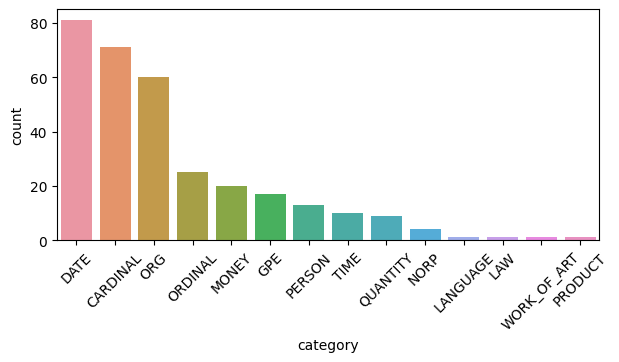

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
plt.xticks(rotation=45)
entity_categories = pd.DataFrame(entity_counter, columns=["category", "count"])
sns.barplot(x="category", y="count", data=entity_categories);